# Classification  


# 1. Import Packages

In [1]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.cluster import AgglomerativeClustering

In [2]:
## Exploratory Data Analysis
df_training = pd.read_csv('training_v2.csv')
print("Dimensions of training data set (files, columns)  : ", df_training.shape)
df_training.sample(5)

Dimensions of training data set (files, columns)  :  (91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
58027,75390,44086,176,0,73.0,30.121094,1,Caucasian,F,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
46778,24046,13705,21,0,59.0,46.112592,0,Caucasian,F,152.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
34987,42232,37816,70,0,63.0,40.195059,0,Caucasian,M,167.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
5232,124621,48134,118,0,70.0,NaN,0,Native American,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
58989,4321,53199,39,0,84.0,33.036422,0,Caucasian,M,163.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [3]:
#df_test = pd.read_csv('unlabeled.csv')
#print("Dimensions of test data set (files, columns)  : ", df_test.shape)
#df_test.head()

In [4]:
#df_dictionary = pd.read_csv('WiDS Datathon 2020 Dictionary.csv')
#print("Dimensions of dictionary data set (files, columns)  : ", df_dictionary.shape)
#df_dictionary.head(10)

In [5]:
df_training.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [6]:
df_training.describe(np.arange(0.1, 1, 0.1))

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13215.600000,13108.400000,19.000000,0.000000,37.000000,20.541293,0.000000,155.000000,133.000000,0.003472,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,26352.400000,26278.400000,35.000000,0.000000,49.000000,22.769438,0.000000,160.000000,307.000000,0.018750,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,39480.200000,39386.600000,60.000000,0.000000,55.000000,24.443699,0.000000,163.000000,394.000000,0.052778,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,52555.800000,52545.800000,81.000000,0.000000,60.000000,26.059302,0.000000,167.500000,451.000000,0.090278,...,0.040000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60%,78655.200000,78631.200000,128.000000,0.000000,69.000000,29.444740,0.000000,172.700000,607.000000,0.207639,...,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df_training.drop('encounter_id', axis=1, inplace=True)
df_training.drop('patient_id', axis=1, inplace=True)
df_training.drop('hospital_id', axis=1, inplace=True)
df_training.drop('readmission_status', axis=1, inplace=True)
df_training.drop('icu_id', axis=1, inplace=True)

In [8]:
df_training.gender.replace({'M':0, 'F':1}, inplace=True)

In [9]:
df = pd.get_dummies(df_training)

In [10]:
df.head()

,hospital_death,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,22.73,0,0.0,180.3,0.541667,73.9,2.3,113.0,...,1,0,0,0,0,0,0,0,0,0
1,0,77.0,27.42,0,1.0,160.0,0.927778,70.2,NaN,108.0,...,0,0,0,0,0,0,1,0,0,0
2,0,25.0,31.95,0,1.0,172.7,0.000694,95.3,NaN,122.0,...,0,0,0,1,0,0,0,0,0,0
3,0,81.0,22.64,1,1.0,165.1,0.000694,61.7,NaN,203.0,...,1,0,0,0,0,0,0,0,0,0
4,0,19.0,NaN,0,0.0,188.0,0.073611,NaN,NaN,119.0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Data balance analysis.
# Percentage of people who did not die (0) and who did die (1)

df['hospital_death'].value_counts(normalize=True)


# Clearly we are facing an imbalanced dataset.

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

In [29]:
#create list of column names in csv
df_columns = pd.DataFrame(list(df.columns))

df_columns.to_csv('file.csv', index=False)

In [12]:
#import pandas_profiling as pp
#report = pp.ProfileReport(df_training)
#report.to_file('data_assessment_train.html')

In [13]:
imp = IterativeImputer(max_iter=5, random_state=0)
imp.fit(df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=5, max_value=None, min_value=None, missing_values=nan,
                 n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [14]:
imputed = pd.DataFrame(imp.transform(df))

In [15]:
imputed.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
227    0
228    0
229    0
230    0
231    0
Length: 232, dtype: int64

In [16]:
imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
## Clustering

#from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs


# Get features we need
features = list(imputed.columns)

### Get the features data
data = imputed[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
!pip install hvplot

In [19]:
## Choosing Optimal K
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
#squared_errors = []

#for num_iter in range(1,21):
#  km = KMeans(n_clusters=num_iter, random_state=42)
#  km.fit(data)
#  squared_errors.append(km.inertia_)
#trying to iterate from 1 to 20
# comparing wcss
# check for the best k to use
#plt.plot(squared_errors, marker = 'o')

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=5, random_state=42)

# Fit all data to model; so all X
km.fit(data)

# Get labels
labels = km.predict(data)

# Create new dataframe with features and labels
#new_data = data.copy()

# Add labels to new_data dataframe
data['clusters'] = labels

## Agglomerative Clustering
# Clustering using AGC
#agc = AgglomerativeClustering()

# Fit data to model
#agc.fit(data)

# Get labels
#labels = agc.labels_

# Create new dataframe with features and labels
#new_data = data.copy()

# Add labels to data dataframe
#data['clusters'] = labels

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df.head()

,hospital_death,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,68.0,22.73,0,0.0,180.3,0.541667,73.9,2.3,113.0,...,1,0,0,0,0,0,0,0,0,0
1,0,77.0,27.42,0,1.0,160.0,0.927778,70.2,NaN,108.0,...,0,0,0,0,0,0,1,0,0,0
2,0,25.0,31.95,0,1.0,172.7,0.000694,95.3,NaN,122.0,...,0,0,0,1,0,0,0,0,0,0
3,0,81.0,22.64,1,1.0,165.1,0.000694,61.7,NaN,203.0,...,1,0,0,0,0,0,0,0,0,0
4,0,19.0,NaN,0,0.0,188.0,0.073611,NaN,NaN,119.0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
data = pd.DataFrame(data)
data.columns = [df.columns]

In [34]:
data.head()

,hospital_death,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
data.columns

MultiIndex([(                         'hospital_death',),
            (                                    'age',),
            (                                    'bmi',),
            (                       'elective_surgery',),
            (                                 'gender',),
            (                                 'height',),
            (                       'pre_icu_los_days',),
            (                                 'weight',),
            (                         'albumin_apache',),
            (                     'apache_2_diagnosis',),
            ...
            (   'apache_2_bodysystem_Gastrointestinal',),
            (       'apache_2_bodysystem_Haematologic',),
            (          'apache_2_bodysystem_Metabolic',),
            (         'apache_2_bodysystem_Neurologic',),
            ('apache_2_bodysystem_Renal/Genitourinary',),
            (        'apache_2_bodysystem_Respiratory',),
            (             'apache_2_bodysystem_Trauma',)

In [ ]:
#from sklearn.decomposition import PCA
#X = np.array([[-1, -1],[-2, -1],[-3, -2], [1, 1], [2, 1], [3, 2]])
#pca = PCA(n_components=2)
#pca.fit(X)

#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

# Feature Selection

I wanted to select the best features for the model. I used KBest for this as using RFE was taking too long.

In [38]:
X = data.iloc[:,1:232]
X.head()

,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,502.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,203.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,703.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,1206.03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,601.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
data.columns

MultiIndex([(                         'hospital_death',),
            (                                    'age',),
            (                                    'bmi',),
            (                       'elective_surgery',),
            (                                 'gender',),
            (                                 'height',),
            (                       'pre_icu_los_days',),
            (                                 'weight',),
            (                         'albumin_apache',),
            (                     'apache_2_diagnosis',),
            ...
            (   'apache_2_bodysystem_Gastrointestinal',),
            (       'apache_2_bodysystem_Haematologic',),
            (          'apache_2_bodysystem_Metabolic',),
            (         'apache_2_bodysystem_Neurologic',),
            ('apache_2_bodysystem_Renal/Genitourinary',),
            (        'apache_2_bodysystem_Respiratory',),
            (             'apache_2_bodysystem_Trauma',)

In [43]:
data = data.reset_index()

In [44]:
data.columns

MultiIndex([(                                  'index',),
            (                         'hospital_death',),
            (                                    'age',),
            (                                    'bmi',),
            (                       'elective_surgery',),
            (                                 'gender',),
            (                                 'height',),
            (                       'pre_icu_los_days',),
            (                                 'weight',),
            (                         'albumin_apache',),
            ...
            (   'apache_2_bodysystem_Gastrointestinal',),
            (       'apache_2_bodysystem_Haematologic',),
            (          'apache_2_bodysystem_Metabolic',),
            (         'apache_2_bodysystem_Neurologic',),
            ('apache_2_bodysystem_Renal/Genitourinary',),
            (        'apache_2_bodysystem_Respiratory',),
            (             'apache_2_bodysystem_Trauma',)

In [46]:
data_fixed = data.reset_index()

In [47]:
data_fixed.head()

,level_0,index,hospital_death,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,clusters
0,0,0,0.0,68.0,22.730000,0.0,0.0,180.3,0.541667,73.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,0.0,77.0,27.420000,0.0,1.0,160.0,0.927778,70.200000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
2,2,2,0.0,25.0,31.950000,0.0,1.0,172.7,0.000694,95.300000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,3,0.0,81.0,22.640000,1.0,1.0,165.1,0.000694,61.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,4,4,0.0,19.0,29.323146,0.0,0.0,188.0,0.073611,102.966305,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [48]:
data.drop('index', axis=1, inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [49]:
data.columns

MultiIndex([(                         'hospital_death',),
            (                                    'age',),
            (                                    'bmi',),
            (                       'elective_surgery',),
            (                                 'gender',),
            (                                 'height',),
            (                       'pre_icu_los_days',),
            (                                 'weight',),
            (                         'albumin_apache',),
            (                     'apache_2_diagnosis',),
            ...
            (   'apache_2_bodysystem_Gastrointestinal',),
            (       'apache_2_bodysystem_Haematologic',),
            (          'apache_2_bodysystem_Metabolic',),
            (         'apache_2_bodysystem_Neurologic',),
            ('apache_2_bodysystem_Renal/Genitourinary',),
            (        'apache_2_bodysystem_Respiratory',),
            (             'apache_2_bodysystem_Trauma',)

In [51]:
y = data.iloc[:,0]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: (hospital_death,), dtype: float64

In [ ]:
#from sklearn.datasets import load_digits
#from sklearn.feature_selection import SelectKBest, chi2
#X, y = load_digits(return_X_y=True)
#X.shape

#X_new = SelectKBest(chi2, k=10)
#X_new.fit(X, y)


In [ ]:
#X_new.get_support()

In [52]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91708    0.0
91709    0.0
91710    0.0
91711    0.0
91712    0.0
Name: (hospital_death,), Length: 91713, dtype: float64

In [53]:
X

,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.000000,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,502.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77.000000,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,203.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,25.000000,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,703.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.000000,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,1206.03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.000000,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,601.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0.0,0.0,177.8,0.298611,72.900000,2.800441,113.0,501.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91709,56.000000,47.179671,0.0,1.0,183.0,0.120139,158.000000,2.801790,113.0,501.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,48.000000,27.236914,0.0,0.0,170.2,0.046528,78.900000,2.900000,123.0,702.01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
91711,74.384367,23.297481,0.0,1.0,154.9,0.081944,55.900000,2.917924,108.0,203.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.svm import SVR

In [ ]:
#estimator = SVR(kernel="linear")
#selector = RFE(estimator,5,step=1)
#selector = selector.fit(X, y)

In [ ]:
#selector

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# 4. Predictive Analytics using Logistic Regression
Train a model that predicts if the person clicked on the ad or not.

In [ ]:
# initialize model
#log_reg = LogisticRegression()

# fit model
#log_reg.fit(X_train, y_train)

# metrics (accuracy)
#acc = log_reg.score(X_test, y_test)


# predictions
#y_pred = log_reg.predict(X_test)

In [ ]:
# feature importance
#log_reg.coef_

# 5. Metrics

## Accuracy
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples:



In [ ]:
# accuracy
#acc

## Precision

In [ ]:
#from sklearn.metrics import precision_score

#precision_score(y_test, y_pred)

## Recall

In [ ]:
#from sklearn.metrics import recall_score
#recall_score(y_test, y_pred)

##  Confusion Matrix 

0 are those with income < 50k. 
1 are those with income at >50k

In [55]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

NameError: name 'y_pred' is not defined

In [ ]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

# SMOTE

This technique "added" more data to make the smaller data more visible.


In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [57]:
X

,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.000000,22.730000,0.0,0.0,180.3,0.541667,73.900000,2.300000,113.0,502.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77.000000,27.420000,0.0,1.0,160.0,0.927778,70.200000,1.536556,108.0,203.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,25.000000,31.950000,0.0,1.0,172.7,0.000694,95.300000,3.010495,122.0,703.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.000000,22.640000,1.0,1.0,165.1,0.000694,61.700000,2.923424,203.0,1206.03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.000000,29.323146,0.0,0.0,188.0,0.073611,102.966305,3.068528,119.0,601.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0.0,0.0,177.8,0.298611,72.900000,2.800441,113.0,501.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91709,56.000000,47.179671,0.0,1.0,183.0,0.120139,158.000000,2.801790,113.0,501.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,48.000000,27.236914,0.0,0.0,170.2,0.046528,78.900000,2.900000,123.0,702.01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
91711,74.384367,23.297481,0.0,1.0,154.9,0.081944,55.900000,2.917924,108.0,203.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91708    0.0
91709    0.0
91710    0.0
91711    0.0
91712    0.0
Name: (hospital_death,), Length: 91713, dtype: float64

In [59]:
y.describe

<bound method NDFrame.describe of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
91708    0.0
91709    0.0
91710    0.0
91711    0.0
91712    0.0
Name: (hospital_death,), Length: 91713, dtype: float64>

In [60]:
data.tail()

,hospital_death,age,bmi,elective_surgery,gender,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,clusters
91708,0.0,75.000000,23.060250,0.0,0.0,177.8,0.298611,72.9,2.800441,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91709,0.0,56.000000,47.179671,0.0,1.0,183.0,0.120139,158.0,2.801790,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91710,0.0,48.000000,27.236914,0.0,0.0,170.2,0.046528,78.9,2.900000,123.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
91711,0.0,74.384367,23.297481,0.0,1.0,154.9,0.081944,55.9,2.917924,108.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
91712,0.0,82.000000,22.031250,1.0,1.0,160.0,0.018056,56.4,2.200000,304.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [61]:
y_res
print(y_res)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
167591    1.0
167592    1.0
167593    1.0
167594    1.0
167595    1.0
Name: (hospital_death,), Length: 167596, dtype: float64


In [63]:
data.value_counts.plot(kind="barh",color="blue")
plt.gca().invert_yaxis()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

# Modeling using Random Forest

using the model on the train model data, and checking the metrics, it is seen that the accuracy, precision, and recall scores has increased. 

In [64]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [65]:
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [66]:
X_train.shape

(55027, 231)

In [67]:
y_train.shape

(55027,)

## ROC Curve

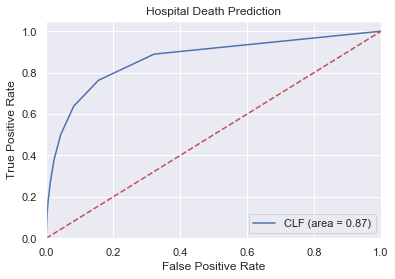

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

clf_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='CLF (area = %0.2f)' % clf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hospital Death Prediction')
plt.legend(loc="lower right")
plt.show()

## Accuracy


In [69]:
clf.score(X_train, y_train)

0.9926218038417504

In [70]:
y_pred=clf.predict(X_train)


## Confusion Matrix

In [71]:
cf = confusion_matrix(y_train, y_pred)
cf

array([[50237,     5],
       [  401,  4384]], dtype=int64)

## Precision

In [ ]:
#prec = 

## Recall

In [ ]:
#recall = 
#recall

In [72]:
y_train.value_counts()

0.0    50242
1.0     4785
Name: (hospital_death,), dtype: int64